In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

# Load the data

In [2]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [4]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    
    e = y - tx @ w
    return e.T @ e / (2*len(y))
    
    # ***************************************************

# 2. Grid Search

Fill in the function `grid_search()` below:

In [5]:
# from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
        
    for (i, w0) in enumerate(grid_w0):
        for (j,w1) in enumerate(grid_w1):
            losses[i,j] = compute_loss(y, tx, [w0, w1])
    
    
    # ***************************************************
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=375870.8203904647, w0*=71.42857142857142, w1*=15.306122448979579, execution time=0.131 seconds


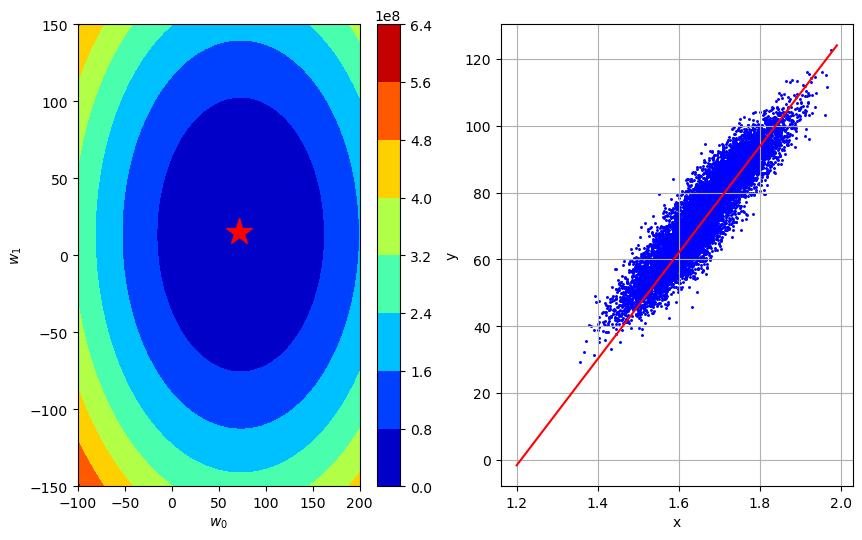

In [6]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=50)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [7]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient vector
    e = y - tx @ w
    grad = - 1/len(y) * tx.T @ e
    return grad
    # ***************************************************
    raise NotImplementedError

grad1 = compute_gradient(y, tx, np.array([100, 20]))
grad2 = compute_gradient(y, tx, np.array([50, 10]))
print(grad1, np.linalg.norm(grad1))
print(grad2, np.linalg.norm(grad2))     

[26.706078    6.52028757] 27.490521129292457
[-23.293922    -3.47971243] 23.552392678247628


Please fill in the functions `gradient_descent` below:

In [8]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of GD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        
        grad = compute_gradient(y, tx, w)
        loss = compute_loss(y, tx, w)
        # TODO: compute gradient and loss
        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        
        w = w - gamma * grad
        # ***************************************************

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [9]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters =50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=55844734.255183354, w0=51.30574540147362, w1=9.435798704492344
GD iter. 1/49: loss=5306049.2421792, w0=66.69746902191567, w1=12.26653831584001
GD iter. 2/49: loss=757567.5910088306, w0=71.31498610804833, w1=13.115760199244328
GD iter. 3/49: loss=348204.24240349006, w0=72.70024123388814, w1=13.37052676426563
GD iter. 4/49: loss=311361.54102900915, w0=73.11581777164007, w1=13.446956733772021
GD iter. 5/49: loss=308045.6979053059, w0=73.24049073296565, w1=13.469885724623941
GD iter. 6/49: loss=307747.2720241726, w0=73.27789262136334, w1=13.476764421879516
GD iter. 7/49: loss=307720.41369487054, w0=73.28911318788263, w1=13.478828031056189
GD iter. 8/49: loss=307717.9964452334, w0=73.29247935783843, w1=13.47944711380919
GD iter. 9/49: loss=307717.778892766, w0=73.29348920882516, w1=13.47963283863509
GD iter. 10/49: loss=307717.759313044, w0=73.29379216412119, w1=13.479688556082861
GD iter. 11/49: loss=307717.757550869, w0=73.29388305071, w1=13.479705271317192
GD iter. 12

In [10]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4. Stochastic gradient descent

In [11]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation. It's the same as the usual gradient.
    e = y - tx @ w
    grad = - 1/len(y) * tx.T @ e
    return grad
    
    # ***************************************************
    raise NotImplementedError


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic gradient descent.
        
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
            
            grad = compute_gradient(minibatch_y, minibatch_tx, w)
            w = w - gamma * grad
            
            loss = compute_loss(y, tx, w)
            ws.append(w)
            losses.append(loss)
        
        
        # ***************************************************

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [12]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=12072874.702998899, w0=47.391341904542486, w1=-9.005216714367439
SGD iter. 1/49: loss=1707177.7610604023, w0=65.35619213819925, w1=4.708256171857062
SGD iter. 2/49: loss=330085.25924965093, w0=71.8007218981712, w1=13.395429358883362
SGD iter. 3/49: loss=335016.93586420675, w0=71.64174320771593, w1=13.464776567677742
SGD iter. 4/49: loss=315055.92723899137, w0=73.591404661915, w1=12.676393660558372
SGD iter. 5/49: loss=309578.6735356567, w0=73.49512408789874, w1=13.098124520375402
SGD iter. 6/49: loss=322409.89681407437, w0=72.6281156984145, w1=14.492587506117962
SGD iter. 7/49: loss=309394.398862555, w0=72.9301652207214, w1=13.667715500373644
SGD iter. 8/49: loss=319619.7432317749, w0=74.02373689848606, w1=12.668806273624334
SGD iter. 9/49: loss=330301.2975000565, w0=73.52385955683576, w1=11.994625658645198
SGD iter. 10/49: loss=335738.29572752584, w0=72.80789047628758, w1=11.877892472881822
SGD iter. 11/49: loss=310918.54342612403, w0=72.7357962849487, w1=13.38711

In [13]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5. Effect of Outliers and MAE Cost Function

In [14]:
import datetime
from helpers import *

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: reload the data by subsampling first, then by subsampling and adding outliers

height, weight, gender = load_data(sub_sample=True, add_outlier=False)

# ***************************************************

x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [15]:
y.shape, tx.shape

((200,), (200, 2))

In [16]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# INSERT YOUR CODE HERE
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)

# ***************************************************


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=96349.81315132366, w0=54.20172049419092, w1=23.2458728593218
SGD iter. 1/49: loss=14046.18762086947, w0=67.18238501824072, w1=15.634592478151173
SGD iter. 2/49: loss=5965.990158788591, w0=72.11260764058092, w1=14.959130163668588
SGD iter. 3/49: loss=5527.501613722667, w0=73.0891898184845, w1=14.711712694834322
SGD iter. 4/49: loss=5587.9283965738705, w0=73.71148320044898, w1=15.279755881273827
SGD iter. 5/49: loss=5560.980873656795, w0=73.30387585648893, w1=15.116165973005543
SGD iter. 6/49: loss=5666.832069669113, w0=72.60966081489771, w1=14.43625682006725
SGD iter. 7/49: loss=5500.051771267669, w0=73.67372258745569, w1=14.015627578361373
SGD iter. 8/49: loss=5499.060035448594, w0=74.08834331580083, w1=14.45497016058431
SGD iter. 9/49: loss=5707.259217020493, w0=72.64749707627755, w1=13.946891198284732
SGD iter. 10/49: loss=5505.325155086365, w0=73.44734816735306, w1=14.929091200089433
SGD iter. 11/49: loss=5518.26453677789, w0=74.17283715357497, w1=14.36505736126

In [17]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 6. Subgradient descent

In [27]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute subgradient gradient vector for MAE

    e = y - tx @ w
 
    return - 1/ y.shape[0] * tx.T @ np.sign(e)


    # ***************************************************


In [28]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute subgradient and loss
        grad = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w)

        # ***************************************************
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by subgradient

        w = w - gamma * grad

        # ***************************************************


        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [29]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=1131708.8897753665, w0=0.7000000000000004, w1=1.6186704754339585e-15
SubGD iter. 1/499: loss=1111189.8534866415, w0=1.4000000000000008, w1=3.237340950867917e-15
SubGD iter. 2/499: loss=1090866.8171979168, w0=2.1000000000000014, w1=4.856011426301876e-15
SubGD iter. 3/499: loss=1070739.7809091923, w0=2.8000000000000016, w1=6.474681901735834e-15
SubGD iter. 4/499: loss=1050808.7446204673, w0=3.5000000000000018, w1=8.093352377169793e-15
SubGD iter. 5/499: loss=1031073.7083317426, w0=4.200000000000002, w1=9.712022852603753e-15
SubGD iter. 6/499: loss=1011534.672043018, w0=4.900000000000002, w1=1.1330693328037712e-14
SubGD iter. 7/499: loss=992191.6357542932, w0=5.600000000000002, w1=1.2949363803471671e-14
SubGD iter. 8/499: loss=973044.5994655687, w0=6.3000000000000025, w1=1.456803427890563e-14
SubGD iter. 9/499: loss=954093.5631768438, w0=7.000000000000003, w1=1.618670475433959e-14
SubGD iter. 10/499: loss=935338.526888119, w0=7.700000000000003, w1=1.780537522977355

In [30]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [33]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: implement stochastic subgradient descent.
        for minibatch_y, minibatch_tx in batch_iter(y, tx, 32):
            
            grad = compute_subgradient_mae(minibatch_y, minibatch_tx, w)
            w = w - gamma * grad
            
            loss = compute_loss(y, tx, w)
            ws.append(w)
            losses.append(loss)
        


        # ***************************************************
        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [34]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=1110698.452704146, w0=0.7, w1=0.08511671065222107
SubSGD iter. 1/499: loss=1090749.2237528972, w0=1.4, w1=0.020323025907934056
SubSGD iter. 2/499: loss=1069993.6307359545, w0=2.0999999999999996, w1=0.1294412233629399
SubSGD iter. 3/499: loss=1050427.0275062707, w0=2.8, w1=0.06607455159113078
SubSGD iter. 4/499: loss=1031312.3038440375, w0=3.5, w1=-0.04114771739943349
SubSGD iter. 5/499: loss=1011411.960991275, w0=4.2, w1=0.021208122451195036
SubSGD iter. 6/499: loss=992223.4849869765, w0=4.9, w1=-0.005499418548884704
SubSGD iter. 7/499: loss=973059.2961680909, w0=5.6000000000000005, w1=-0.0025379445103320183
SubSGD iter. 8/499: loss=955034.4284228226, w0=6.300000000000001, w1=-0.16158851747959477
SubSGD iter. 9/499: loss=936208.2065046708, w0=7.000000000000001, w1=-0.14942519999173293
SubSGD iter. 10/499: loss=918740.5079523559, w0=7.700000000000001, w1=-0.3348021518355016
SubSGD iter. 11/499: loss=900255.3399075116, w0=8.4, w1=-0.31417205523189307
SubSGD iter.

In [35]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>